# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [59]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [6]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [7]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

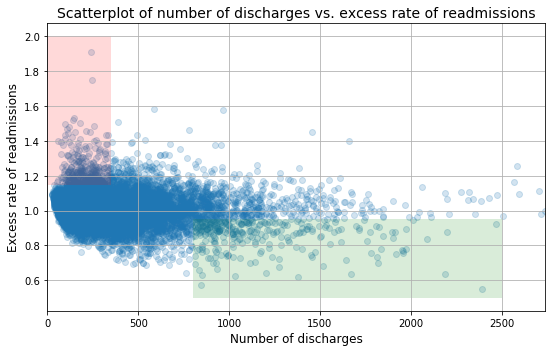

In [8]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.  

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A

    
    Here it is not noted that the hospitals/facilities in question are not those for the general population, but those for the sample. Therefore, the mean excess readmission rate should be noted with a confidence interval in relation to the true mean. 

    Again the need for confidence intervals is important, since the difference between small and large hospitals might disappear. Probably a hypothesis test between the two should be used to determine how different the two values truly are. Further, one should determine if the difference in amount of resources between small and large hospitals is statistically significant. Also, one should determine how the resources are allocated at each hospital. Without more information one might make changes which won't actually affect the readmission rate.   

    Further, in the recommendation section an assumption is made about caussation vs. correlation. It is not necessarily the case that decreasing the number of hospitals and thereby increasing the capacity and number of discharges will decrease the rate of readmissions. More work should be done to determine if any other variables account for the discrepency. 

# B

To determine whether the difference of means between the large and small hospitals is statistically significant we can run a frequentist test with the following hypotheses:

$H_0$: the difference of means between small and large hospitals is zero
$H_A$: the difference of means between small and large hospitals is non-zero


In [49]:
mean_100 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'].mean()
mean_1000 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'].mean()
std_100 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'].std()
std_1000 = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'].std()
n = len(clean_hospital_read_df.loc[(clean_hospital_read_df['Number of Discharges'] < 100) & (np.isnan(clean_hospital_read_df['Excess Readmission Ratio']) == False)])
m = len(clean_hospital_read_df.loc[(clean_hospital_read_df['Number of Discharges'] > 1000) & (np.isnan(clean_hospital_read_df['Excess Readmission Ratio']) == False)])
diff_mean = mean_100 - mean_1000
diff_std = np.sqrt((std_100**2)/n + (std_1000**2)/m)
t = diff_mean/diff_std
p = stats.t.sf(np.abs(t), m)
conf_interval = [-1.645*diff_std, 1.645*diff_std]
print('p-value is: '+ str(p))
print('90% confidence interval for the difference of means is: '+ str(conf_interval))

p-value is: 8.19204345137e-14
90% confidence interval for the difference of means is: [-0.0095827264590123938, 0.0095827264590123938]


From this it is clear that the difference of means between the two are not due to pure chance if we take a statistical significance of $\alpha = 0.01$. Thus we can agree with the conclusion found in the above analysis, that the difference is certainly there and is unlikely to be random.  

The results are undoubtebly statistically significant. In regards to practical significance, this depends on many variables. Of importance is the observation that the larger discharge group is only at a ratio of 1.023, where a ratio greater than 1.0 indicates excess readmissions. This leads to a percent difference between the quantities of only 2%. Consequently, I would say that even though the result is statistically significant, this difference is too small to deam significant to change. Unless the cost of making the change is exceedingly small, I would advice against making the change.

In [52]:
percent_diff = np.abs(1.023 - 1.0)/((1.023+1.0)/2)
print(percent_diff*100)

2.27385071676


In regards to the plot, I think it is slightly misleading, particularly with the coloring. I think it would be better if the less than 100 entire group was colored, along with the greater than 1000 group. Coloring in only the outliers gives the impression that the center point of them is the mean and thus the difference of means would be quite great. This is not the case as we saw in the hypothesis testing. Here is my alternative plot:

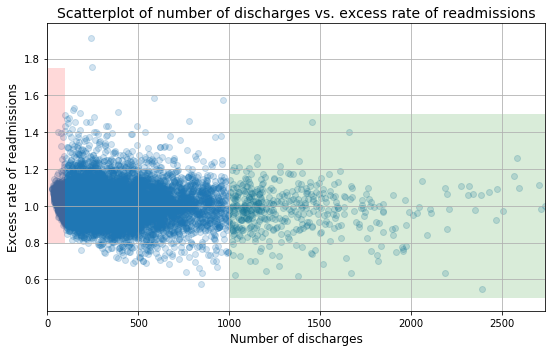

In [57]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,100], 0.8, 1.75, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([1000,3000], 0.5, 1.50, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

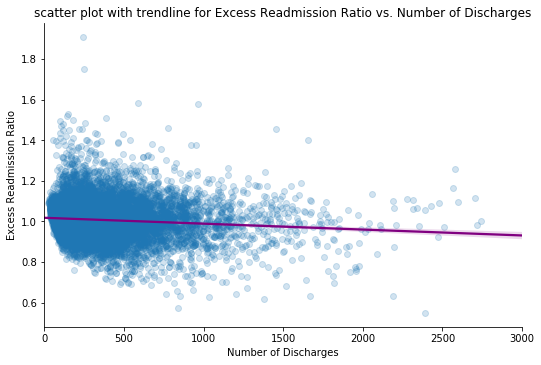

In [103]:
# fig, ax = plt.subplots(figsize=(8,5))
sns.lmplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df, aspect=1.5, fit_reg=True, scatter_kws={'alpha':0.2}, line_kws = {'color': 'purple'})
plt.xlim([0,3000])
u = plt.title('scatter plot with trendline for Excess Readmission Ratio vs. Number of Discharges')

This is another way to visualize the data. The difference of course is that there is no extraneous grid lines, but also there is a trend line. The trend line shows at the original interpretation of the data as having a 'significant' downward trend isn't very true. As one can see, the trend line does have a downward trend, but it is fairly flat.